In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('saved_df.pkl')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(707, 9)

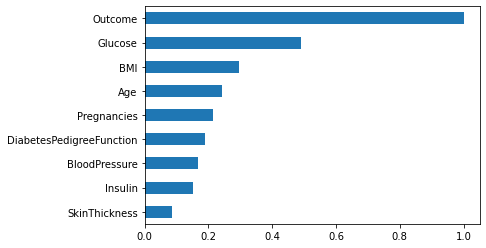

In [4]:
df.corr()["Outcome"].sort_values().plot.barh()

In [5]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]])

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [7]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,494.0,3.696356,3.087124,0.000,1.00000,3.0000,6.0000,12.00
Glucose,494.0,121.362348,29.868887,56.000,99.00000,116.0000,140.0000,199.00
BloodPressure,494.0,72.536437,11.833432,40.000,64.00000,72.0000,80.0000,122.00
SkinThickness,494.0,21.216599,15.186990,0.000,0.00000,24.0000,33.0000,63.00
Insulin,494.0,83.748988,116.644576,0.000,0.00000,46.5000,130.0000,846.00
BMI,494.0,32.447571,6.743599,18.200,27.80000,32.1500,36.7500,67.10
DiabetesPedigreeFunction,494.0,0.474142,0.339204,0.078,0.24025,0.3725,0.6355,2.42
Age,494.0,33.172065,11.731303,21.000,24.00000,29.0000,41.0000,67.00


In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
a = pd.DataFrame(X_train, columns = X.columns)
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.874306,-1.419714,0.208398,0.578937,-0.718712,-0.066437,-0.230602,-0.953295
1,-0.874306,2.266781,-1.060482,0.117549,6.541442,-0.348471,-0.224700,2.203857
2,0.746967,0.524074,-0.975890,-1.398441,-0.718712,-1.224262,-0.953614,1.862543
3,2.043985,-0.984038,-0.891298,-1.398441,-0.718712,-0.971915,-0.906397,-0.185339
4,-0.225797,-0.481334,-0.891298,-0.541577,-0.306789,-1.417233,0.601600,-0.867966
...,...,...,...,...,...,...,...,...
489,1.071221,-1.285660,0.462174,0.315286,-0.109409,-0.467223,0.864246,0.241303
490,0.098458,-0.749443,0.292990,-0.409752,-0.281043,-1.372701,-0.741137,-1.038623
491,-1.198560,1.328400,-1.906402,-1.398441,-0.718712,-1.565672,-0.649654,2.715828
492,-1.198560,0.524074,0.969726,0.381199,-0.718712,-0.764101,-0.717528,2.203857


In [10]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,494.0,-5.337611e-19,1.001014,-1.198560,-0.874306,-0.225797,0.746967,2.692494
Glucose,494.0,4.067821e-17,1.001014,-2.190527,-0.749443,-0.179712,0.624615,2.601917
BloodPressure,494.0,3.780152e-16,1.001014,-2.752322,-0.722114,-0.045378,0.631358,4.184222
SkinThickness,494.0,3.820606e-17,1.001014,-1.398441,-1.398441,0.183461,0.776674,2.754052
Insulin,494.0,4.404933e-17,1.001014,-0.718712,-0.718712,-0.319661,0.396914,6.541442
BMI,494.0,-4.055460e-16,1.001014,-2.114896,-0.689881,-0.044171,0.638649,5.143775
DiabetesPedigreeFunction,494.0,-3.539679e-17,1.001014,-1.169042,-0.690231,-0.299952,0.476180,5.742366
Age,494.0,2.148529e-16,1.001014,-1.038623,-0.782638,-0.355996,0.667945,2.886485


In [11]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[122,  24],
       [ 31,  36]])

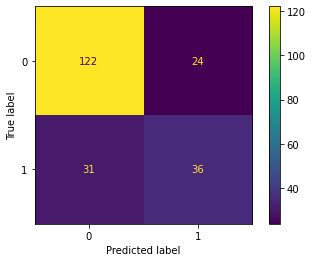

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test,values_format='d');

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



# **Model Tunnning**

In [14]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors" : np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 13}

In [15]:
knn_tuned = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129  17]
 [ 35  32]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



In [16]:
# error_rate = []
# for i in range(1, 40):
#     model = KNeighborsClassifier(n_neighbors = i)
#     model.fit(X_train, y_train)
#     y_pred_i = model.predict(X_test)
    
#     error_rate.append(np.mean(y_pred_i != y_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [17]:
#GridSearch with Recall

In [18]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10, scoring='recall').fit(X_train, y_train)
knn_cv_model.best_params_


{'n_neighbors': 1}

In [19]:
knn_tuned = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110  36]
 [ 28  39]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       146
           1       0.52      0.58      0.55        67

    accuracy                           0.70       213
   macro avg       0.66      0.67      0.66       213
weighted avg       0.71      0.70      0.70       213



# **model deployment**

In [26]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  24]
 [ 31  36]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



#Saving Model

In [27]:
import pickle
pickle.dump(log_model, open("my_model", 'wb'))

In [28]:
model = pickle.load(open("my_model", 'rb'))

#predict a result

In [29]:
prediction = model.predict(X)

In [30]:
prediction[:5]

array([1, 0, 1, 0, 1])

In [31]:
df['Pred'] = prediction

In [33]:
df.sample(29)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
672,10,68,106,23,49,35.5,0.285,47,0,0
135,2,125,60,20,140,33.8,0.088,31,0,0
573,2,98,60,17,120,34.7,0.198,22,0,0
254,12,92,62,7,258,27.6,0.926,44,1,1
678,3,121,52,0,0,36.0,0.127,25,1,0
721,1,114,66,36,200,38.1,0.289,21,0,0
598,1,173,74,0,0,36.8,0.088,38,1,0
485,0,135,68,42,250,42.3,0.365,24,1,0
67,2,109,92,0,0,42.7,0.845,54,0,0
405,2,123,48,32,165,42.1,0.520,26,0,1


In [38]:
df[df['Outcome']!= df['Pred']]['Pred'].count()

178

In [39]:
(df["Outcome"] == df["Pred"]).value_counts()

True     529
False    178
dtype: int64

In [40]:
pred_prob = model.predict_proba(X)
pred_prob

array([[0.32314036, 0.67685964],
       [0.92282449, 0.07717551],
       [0.11453168, 0.88546832],
       ...,
       [0.8028262 , 0.1971738 ],
       [0.74936889, 0.25063111],
       [0.90252618, 0.09747382]])

In [46]:
pred_prob[:5][:,1]

array([0.67685964, 0.07717551, 0.88546832, 0.05958364, 0.99340071])

In [47]:
df['PredProba'] = pred_prob[:,1]

In [48]:
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,PredProba
0,6,148,72,35,0,33.6,0.627,50,1,1,0.676860
1,1,85,66,29,0,26.6,0.351,31,0,0,0.077176
2,8,183,64,0,0,23.3,0.672,32,1,1,0.885468
3,1,89,66,23,94,28.1,0.167,21,0,0,0.059584
4,0,137,40,35,168,43.1,2.288,33,1,1,0.993401
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.212718
764,2,122,70,27,0,36.8,0.340,27,0,0,0.286423
765,5,121,72,23,112,26.2,0.245,30,0,0,0.197174
766,1,126,60,0,0,30.1,0.349,47,1,0,0.250631


In [50]:
df[df['Outcome']!= df['Pred']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,PredProba
6,3,78,50,32,88,31.0,0.248,26,1,0,0.133560
8,2,197,70,45,543,30.5,0.158,53,1,0,0.298494
12,10,139,80,0,0,27.1,1.441,57,0,1,0.947504
13,1,189,60,23,846,30.1,0.398,59,1,0,0.351171
16,0,118,84,47,230,45.8,0.551,31,1,0,0.243003
...,...,...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0,1,0.525851
749,6,162,62,0,0,24.3,0.178,50,1,0,0.467571
753,0,181,88,44,510,43.3,0.222,26,1,0,0.271625
757,0,123,72,0,0,36.3,0.258,52,1,0,0.164562


In [61]:
df[df['Outcome']!= df['Pred']][['Pred','PredProba','Outcome']]
adf = df[df['Outcome']!= df['Pred']][['Pred','PredProba','Outcome']]

In [63]:
adf

,Pred,PredProba,Outcome
6,0,0.133560,1
8,0,0.298494,1
12,1,0.947504,0
13,0,0.351171,1
16,0,0.243003,1
...,...,...,...
747,1,0.525851,0
749,0,0.467571,1
753,0,0.271625,1
757,0,0.164562,1


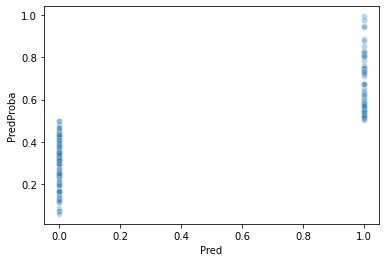

In [78]:
sns.scatterplot('Pred', 'PredProba',data = adf,alpha=0.3)

In [65]:
my_dict={'Pregnancies':10,
        'Glucose':180,
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38,
        'DiabetesPedigreeFunction':0.15,
        'Age':50}
df_sample=pd.DataFrame([my_dict])
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [66]:
single_pred=model.predict(df_sample)
print(single_pred)

[1]


In [68]:
single_pred_proba=model.predict_proba(df_sample)
print(single_pred_proba[:,1])

[0.79323504]
